<img src="https://github.com/gantian127/bmi_dbseabed/blob/master/docs/source/_static/bmi_dbseabed_logo.png?raw=true" width='600' align='center'></a>

## Quick Start Tutorial 

This notebook will help you get started using the bmi_dbseabed package to download the dbSEABED marine substrates datasets. 

This tutorial includes the following sections:

1. [Brief Introduction](#section1)

   This section provides basic information about bmi_dbseabed package. 
   <br>
   
2. [Start with Examples](#section2)
   
   This section provides two examples to demonstrate how to use bmi_dbseabed to download datasets for visualization.
   <br>
   
3. [Write Your Own Code](#section3)

   This section provides guide to write your own code to download different datasets from dbSEABED.
   <br>
   
**Suggested citation**: Gan, T. (2024). Jupyter Notebooks for the dbSEABED Data Component, HydroShare, https://www.hydroshare.org/resource/e43626941b054b84828e3717d58a6f1a/

<a id='section1'></a>
## 1. Brief Introduction


bmi_dbseabed package provides a set of functions that allows downloading of the datasets from [dbSEABED](https://instaar.colorado.edu/~jenkinsc/dbseabed/), a collection of marine substrates datasets across the US.

bmi_dbseabed package also includes a Basic Model Interface ([BMI](https://bmi.readthedocs.io/en/latest/)), which converts the dbSEABED dataset into a reusable, plug-and-play data component for [PyMT](https://pymt.readthedocs.io/en/latest/?badge=latest) modeling framework developed by Community Surface Dynamics Modeling System ([CSDMS](https://csdms.colorado.edu/wiki/Main_Page)). 


To install bmi_dbseabed package, please follow the instructions [here](https://github.com/gantian127/bmi_dbseabed/tree/master?tab=readme-ov-file#install-package).

<a id='section2'></a>
## 2. Start with Examples

In bmi_dbseabed package, DbSeabed class is designed for users to download datasets. BmiDbSeabed class is designed to convert the dbSEABED dataset as a data component for the [PyMT](https://pymt.readthedocs.io/en/latest/?badge=latest) modeling framework. The following examples demonstrate how to download the same dataset using DbSeabed and BmiDbSeabed for data visualization. 

### Example 1: use DbSeabed class to download data (Recommended method)

Import DbSeabed class and download data with **get_data( )** method. You can check the details of the [parameter settings](https://bmi_dbseabed.readthedocs.io/en/latest/#parameter-settings) for get_data( ) method to better understand the parameter values used in the example.

In [1]:
import matplotlib.pyplot as plt

from bmi_dbseabed import DbSeabed


# get data from dbSEABED
dbseabed = DbSeabed()
data = dbseabed.get_data(
    var_name="carbonate",
    west=-98.0,
    south=18,
    east=-80.1,
    north=30.9,
    output="download.tif",
    local_file=True,
)

To know the metadata of the dataset, you can check the "metadata" attributes. The downloaded dataset is stored in a GeoTiff file.

In [2]:
# show metadata
for key, value in dbseabed.metadata.items():
    print(f"{key}: {value}\n")

# show GeoTiff file path
print(f"file path: {dbseabed.tif_file}")

variable_name: carbonate

bmi_standard_name: ocean_carbonate

variable_units: %

service_url: https://files.isric.org/soilgrids/former/2017-03-10/data/BDRICM_M_250m_ll.tif

crs_wkt: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]

bounding_box: [-98.0, 30.9, -80.1, 18]

grid_res: [0.09999999999999432, 0.10000000000000142]

file path: /Users/tiga7385/Desktop/bmi_dbseabed/notebooks/download.tif


The dbSEABED dataset is loaded as a DataArray object (xarray). You can directly plot the data using its plot( ) method.

Text(0.5, 1.0, 'dbSEABED dataset (Carbonate in %)')

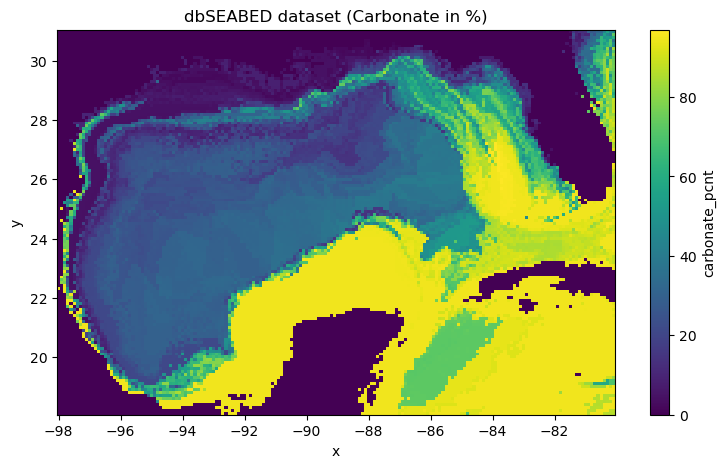

In [3]:
# plot data
data.plot(figsize=(9, 5))
plt.title("dbSEABED dataset (Carbonate in %)")

Aside from the "carbonate" dataset shown above, there are multiple datasets available from dbSEABED. You can check the **data_services** attributes to learn more details.

In [4]:
# list all the available data services 
dbseabed.data_services

Variable name: bathy
Variable units: meter
BMI standard name: ocean_bathymetry 
Data link: https://

Variable name: carbonate
Variable units: %
BMI standard name: ocean_carbonate
Data link: https://files.isric.org/soilgrids/former/2017-03-10/data/BDRICM_M_250m_ll.tif

Variable name: grainsize
Variable units: 
BMI standard name: grain_size
Data link: https://

Variable name: gravel
Variable units: %
BMI standard name: gravel_content
Data link: https://

Variable name: mud
Variable units: %
BMI standard name: mud_content
Data link: https://

Variable name: organic_carbon
Variable units: %
BMI standard name: organic_carbon_content
Data link: https://

Variable name: rock
Variable units: %
BMI standard name: rock_content
Data link: https://

Variable name: sand
Variable units: %
BMI standard name: sand_content
Data link: https://



### Example 2: use BmiDbSeabed class to download data (Demonstration of how to use BMI)

Import BmiDbSeabed class and instantiate it. A configuration file (yaml file) is required to provide the parameter settings for data download. An example configure_file.yaml file is provided in the same folder with this Jupyter Notebook file. 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from bmi_dbseabed import BmiDbSeabed

# initiate a data component
data_comp = BmiDbSeabed()
data_comp.initialize("config_file.yaml")

Use variable related methods from BmiDbSeabed class to check the variable information of the soil dataset. 

In [6]:
# get variable info
var_name = data_comp.get_output_var_names()[0]
var_unit = data_comp.get_var_units(var_name)
var_location = data_comp.get_var_location(var_name)
var_type = data_comp.get_var_type(var_name)
var_grid = data_comp.get_var_grid(var_name)

print(f"{var_name=}")
print(f"{var_unit=}")
print(f"{var_location=}")
print(f"{var_type=}")
print(f"{var_grid=}")

var_name='ocean_carbonate'
var_unit='%'
var_location='node'
var_type='float32'
var_grid=0


Use grid related methods of BmiDbSeabed class to check the grid information of the soil dataset. 

In [7]:
# get variable grid info
grid_rank = data_comp.get_grid_rank(var_grid)

grid_size = data_comp.get_grid_size(var_grid)

grid_shape = np.empty(grid_rank, int)
data_comp.get_grid_shape(var_grid, grid_shape)

grid_spacing = np.empty(grid_rank)
data_comp.get_grid_spacing(var_grid, grid_spacing)

grid_origin = np.empty(grid_rank)
data_comp.get_grid_origin(var_grid, grid_origin)

print(f"{grid_rank=}")
print(f"{grid_size=}")
print(f"{grid_shape=}")
print(f"{grid_spacing=}")
print(f"{grid_origin=}")

grid_rank=2
grid_size=23400
grid_shape=array([130, 180])
grid_spacing=array([0.1, 0.1])
grid_origin=array([ 18.1, -98. ])


Use get_value( ) method to get the data as a numpy 2D array. 

In [8]:
# get variable data
data = np.empty(grid_size, var_type)
data_comp.get_value(var_name, data)
data_2D = data.reshape(grid_shape)

Text(0.5, 1.0, 'Mean pH between 0 and 5 cm soil depth in Senegal')

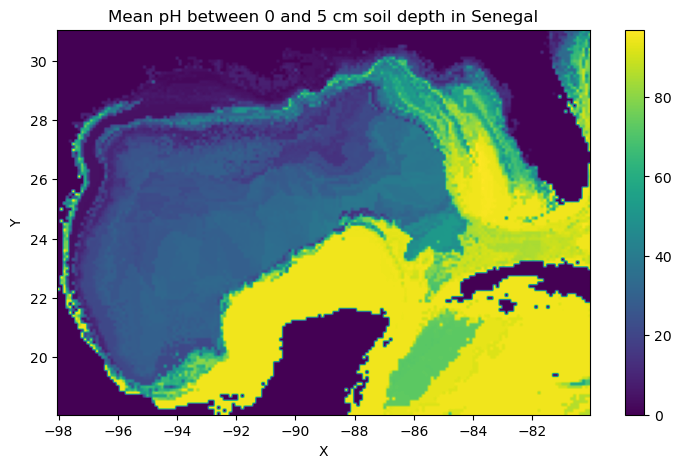

In [9]:
# get X, Y extent for plot
min_y, min_x = grid_origin
max_y = min_y + grid_spacing[0] * (grid_shape[0] - 1)
max_x = min_x + grid_spacing[1] * (grid_shape[1] - 1)
dy = grid_spacing[0] / 2
dx = grid_spacing[1] / 2
extent = [min_x - dx, max_x + dx, min_y - dy, max_y + dy]

# plot data
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
im = ax.imshow(data_2D, extent=extent)
fig.colorbar(im)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Mean pH between 0 and 5 cm soil depth in Senegal")

Complete the example by finalizing the component. finalize( ) method performs tasks that take place after using the data component, such as deallocating memory and closing files.

In [10]:
data_comp.finalize()